## CNN Classifier

This notebook contains the code for the CNN classifier, trained with the full training dataset (i.e. no data reduction has been performed). Note that 5-fold cross-validation has been used to optimize the hyperparameters of the CNN. 

In [10]:
import tensorflow as tf # tensorflow library
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# Loading in 2000 raw image files, which are encoded as row-vectors of size 240.
mfeat_pix = np.loadtxt("mfeat-pix.txt")

# Splitting the data into a training and testing dataset.
trainset = np.concatenate((mfeat_pix[0:100], mfeat_pix[200:300], 
                               mfeat_pix[400:500], mfeat_pix[600:700],
                               mfeat_pix[800:900], mfeat_pix[1000:1100],
                               mfeat_pix[1200:1300], mfeat_pix[1400:1500],
                               mfeat_pix[1600:1700], mfeat_pix[1800:1900]))

# Converting and re-shaping the train vectors to 16 by 15 NumPy arrays containing elements of type 'float32'.
x_train = np.float32(np.array([np.reshape(trainset[i], (16, 15)) for i in range(len(trainset))]))
b = np.array([1]*100)
y_train = np.concatenate((b*0, b, b*2, b*3, b*4, b*5, b*6, b*7, b*8, b*9))

testset = np.concatenate((mfeat_pix[100:200], mfeat_pix[300:400], 
                               mfeat_pix[500:600], mfeat_pix[700:800],
                               mfeat_pix[900:1000], mfeat_pix[1100:1200],
                               mfeat_pix[1300:1400], mfeat_pix[1500:1600],
                               mfeat_pix[1700:1800], mfeat_pix[1900:2000]))

# Converting and re-shaping the test vectors to 16 by 15 NumPy arrays containing elements of type 'float32'.
x_test = np.float32(np.array([np.reshape(testset[i], (16, 15)) for i in range(len(testset))]))
y_test = y_train

In [3]:
# Normalizing the train dataset.
x_train = tf.keras.utils.normalize(x_train, axis=1)
# Normalizing the test dataset.
x_test = tf.keras.utils.normalize(x_test, axis=1)

## Test run with CNN

In [4]:
# Loading the model
model = tf.keras.models.load_model('saved_model/our_cnn')
model.summary()

Model: "sequential_110"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_110 (Reshape)       (None, 16, 15, 1)         0         
                                                                 
 conv2d_220 (Conv2D)         (None, 8, 8, 65)          650       
                                                                 
 batch_normalization_220 (Ba  (None, 8, 8, 65)         260       
 tchNormalization)                                               
                                                                 
 max_pooling2d_220 (MaxPooli  (None, 4, 4, 65)         0         
 ng2D)                                                           
                                                                 
 dropout_220 (Dropout)       (None, 4, 4, 65)          0         
                                                                 
 conv2d_221 (Conv2D)         (None, 4, 4, 65)       

In [5]:
# Evaluating the model performance on the test dataset.
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy: {:.2f}%'.format(test_acc*100))

32/32 [==============================] - 0s 2ms/step - loss: 0.1067 - accuracy: 0.9820

Test accuracy: 98.20%


In [12]:
y_pred = model.predict(x_test).argmax(axis=1) # Predict prob and get Class Indices

32/32 [==============================] - 0s 1ms/step


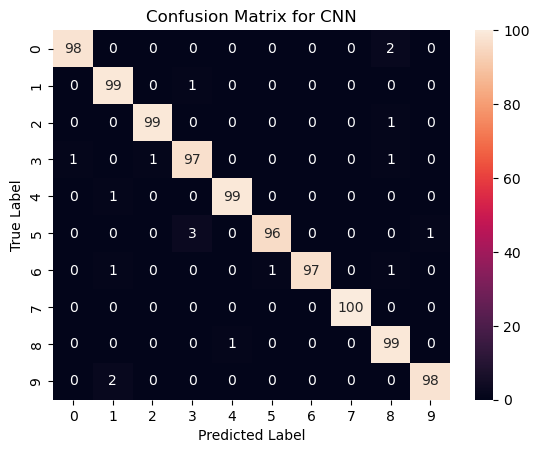

In [13]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix of the kNN classifier.
image = sns.heatmap(conf_mat, annot=True,  
                    fmt='g')
plt.title("Confusion Matrix for CNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()